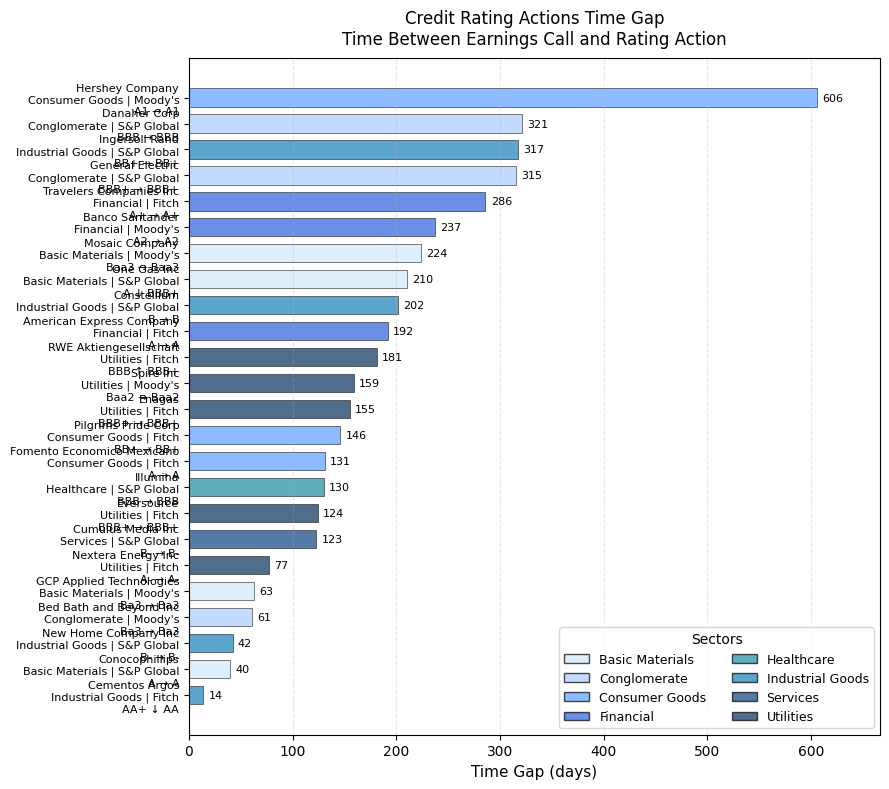

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches

# Create the data
data = {
    'Company': ['Conocophillips', 'GCP Applied Technologies', 'Mosaic Company', 'One Gas Inc',
                'Bed Bath and Beyond Inc', 'Danaher Corp', 'General Electric',
                'Fomento Economico Mexicano', 'Hershey Company', 'Pilgrims Pride Corp',
                'American Express Company', 'Banco Santander', 'Travelers Companies Inc',
                'Illumina', 'Cementos Argos', 'Constellium', 'Ingersoll Rand',
                'New Home Company Inc', 'Cumulus Media Inc', 'Enagas', 'Eversource',
                'Nextera Energy Inc', 'RWE Aktiengesellschaft', 'Spire Inc'],
    'Time Gap': [40, 63, 224, 210, 61, 321, 315, 131, 606, 146, 192, 237, 286, 130, 14, 202, 317, 42, 123, 155, 124, 77, 181, 159],
    'Sector': ['Basic Materials', 'Basic Materials', 'Basic Materials', 'Basic Materials',
               'Conglomerate', 'Conglomerate', 'Conglomerate', 'Consumer Goods',
               'Consumer Goods', 'Consumer Goods', 'Financial', 'Financial', 'Financial',
               'Healthcare', 'Industrial Goods', 'Industrial Goods', 'Industrial Goods',
               'Industrial Goods', 'Services', 'Utilities', 'Utilities', 'Utilities',
               'Utilities', 'Utilities'],
    'Agency': ['S&P Global', "Moody's", "Moody's", 'S&P Global', "Moody's", 'S&P Global',
               'S&P Global', 'Fitch', "Moody's", 'Fitch', 'Fitch', "Moody's", 'Fitch',
               'S&P Global', 'Fitch', 'S&P Global', 'S&P Global', 'S&P Global', 'S&P Global',
               'Fitch', 'Fitch', 'Fitch', 'Fitch', "Moody's"],
    'Action': ['affirm', 'affirm', 'affirm', 'downgrade', 'affirm', 'affirm', 'affirm',
               'affirm', 'affirm', 'affirm', 'affirm', 'affirm', 'affirm', 'affirm',
               'downgrade', 'affirm', 'affirm', 'affirm', 'affirm', 'affirm', 'affirm',
               'affirm', 'upgrade', 'affirm'],
    'Rating From': ['A', 'Ba3', 'Baa3', 'A', 'Ba3', 'BBB', 'BBB+', 'A', 'A1', 'BB+',
                    'A', 'A2', 'A+', 'BBB', 'AA+', 'B', 'BB+', 'B-', 'B-', 'BBB+',
                    'BBB+', 'A-', 'BBB', 'Baa2'],
    'Rating To': ['A', 'Ba3', 'Baa3', 'BBB+', 'Ba3', 'BBB', 'BBB+', 'A', 'A1', 'BB+',
                  'A', 'A2', 'A+', 'BBB', 'AA', 'B', 'BB+', 'B-', 'B-', 'BBB+',
                  'BBB+', 'A-', 'BBB+', 'Baa2']
}

# Create DataFrame
df = pd.DataFrame(data)

# Sort by Time Gap (descending)
df = df.sort_values('Time Gap', ascending=True)

# Create figure and axis
fig, ax = plt.subplots(figsize=(9, 8))

# Define colors for sectors
sector_colors = {
    'Basic Materials': '#D0E7F9',   # Very light sky blue
    'Conglomerate': '#A8CDFE',      # Light sky blue
    'Consumer Goods': '#5BA0FF',    # Bright, clear blue
    'Financial': '#2C60D9',         # Rich medium blue (unchanged)
    'Healthcare': '#1D8AA2',        # Teal-blue, more cyan/green hint for contrast
    'Industrial Goods': '#1780B9',  # Deep cyan-blue (teal hint, unchanged)
    'Services': '#0D427F',          # Dark blue-gray
    'Utilities': '#062F5B'          # Very dark blue
}

# Create horizontal bars
bars = ax.barh(range(len(df)), df['Time Gap'], height=0.7, 
                color=[sector_colors[sector] for sector in df['Sector']], 
                alpha=0.7, edgecolor='black', linewidth=0.5)

# Create Y-axis labels with all the information
y_labels = []
for idx, row in df.iterrows():
    # Define arrow based on action
    if row['Action'] == 'affirm':
        arrow = '→'
    elif row['Action'] == 'upgrade':
        arrow = '↑'
    elif row['Action'] == 'downgrade':
        arrow = '↓'
    
    # Create label with company, sector, agency, and rating information
    label = f"{row['Company']}\n{row['Sector']} | {row['Agency']}\n{row['Rating From']} {arrow} {row['Rating To']}"
    y_labels.append(label)

# Set Y-axis
ax.set_yticks(range(len(df)))
ax.set_yticklabels(y_labels, fontsize=8, ha='right')

# Set X-axis
ax.set_xlabel('Time Gap (days)', fontsize=11, fontweight='normal')
ax.set_xlim(0, max(df['Time Gap']) * 1.1)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, df['Time Gap'])):
    ax.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
            f'{value}', va='center', fontsize=8)

# Add grid
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Create legend for sectors
legend_elements = [mpatches.Patch(facecolor=color, edgecolor='black', label=sector, alpha=0.7)
                  for sector, color in sector_colors.items()]
ax.legend(handles=legend_elements, title='Sectors', loc='lower right', 
          bbox_to_anchor=(1.0, 0.0), ncol=2, fontsize=9)

# Add title
plt.title('Credit Rating Actions Time Gap\nTime Between Earnings Call and Rating Action', 
          fontsize=12, fontweight='normal', pad=10)

# Adjust layout
plt.tight_layout()

# Add action symbols explanation
# action_text = "Actions: → Affirm   ↑ Upgrade   ↓ Downgrade"
# plt.figtext(0.5, 0.02, action_text, ha='center', fontsize=10, style='italic')

# Show the plot
plt.show()

# Optional: Save the figure
# plt.savefig('credit_rating_timeline.png', dpi=300, bbox_inches='tight')

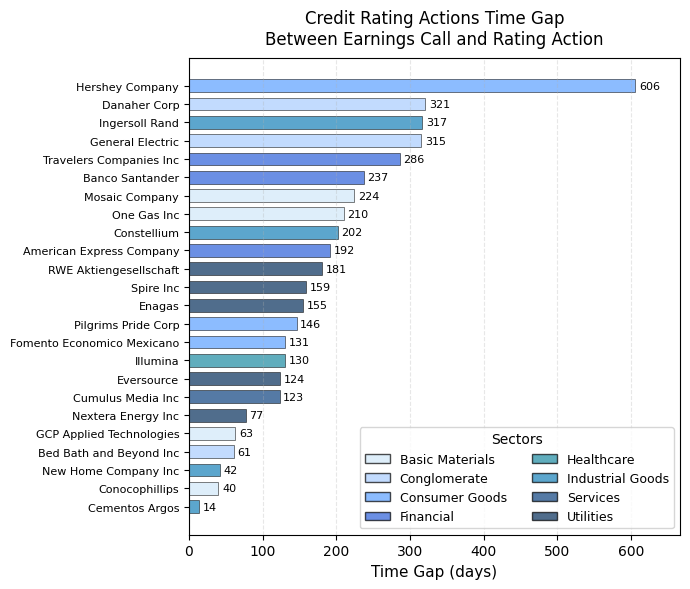

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches

# Create the data
data = {
    'Company': ['Conocophillips', 'GCP Applied Technologies', 'Mosaic Company', 'One Gas Inc',
                'Bed Bath and Beyond Inc', 'Danaher Corp', 'General Electric',
                'Fomento Economico Mexicano', 'Hershey Company', 'Pilgrims Pride Corp',
                'American Express Company', 'Banco Santander', 'Travelers Companies Inc',
                'Illumina', 'Cementos Argos', 'Constellium', 'Ingersoll Rand',
                'New Home Company Inc', 'Cumulus Media Inc', 'Enagas', 'Eversource',
                'Nextera Energy Inc', 'RWE Aktiengesellschaft', 'Spire Inc'],
    'Time Gap': [40, 63, 224, 210, 61, 321, 315, 131, 606, 146, 192, 237, 286, 130, 14, 202, 317, 42, 123, 155, 124, 77, 181, 159],
    'Sector': ['Basic Materials', 'Basic Materials', 'Basic Materials', 'Basic Materials',
               'Conglomerate', 'Conglomerate', 'Conglomerate', 'Consumer Goods',
               'Consumer Goods', 'Consumer Goods', 'Financial', 'Financial', 'Financial',
               'Healthcare', 'Industrial Goods', 'Industrial Goods', 'Industrial Goods',
               'Industrial Goods', 'Services', 'Utilities', 'Utilities', 'Utilities',
               'Utilities', 'Utilities'],
    'Agency': ['S&P Global', "Moody's", "Moody's", 'S&P Global', "Moody's", 'S&P Global',
               'S&P Global', 'Fitch', "Moody's", 'Fitch', 'Fitch', "Moody's", 'Fitch',
               'S&P Global', 'Fitch', 'S&P Global', 'S&P Global', 'S&P Global', 'S&P Global',
               'Fitch', 'Fitch', 'Fitch', 'Fitch', "Moody's"],
    'Action': ['affirm', 'affirm', 'affirm', 'downgrade', 'affirm', 'affirm', 'affirm',
               'affirm', 'affirm', 'affirm', 'affirm', 'affirm', 'affirm', 'affirm',
               'downgrade', 'affirm', 'affirm', 'affirm', 'affirm', 'affirm', 'affirm',
               'affirm', 'upgrade', 'affirm'],
    'Rating From': ['A', 'Ba3', 'Baa3', 'A', 'Ba3', 'BBB', 'BBB+', 'A', 'A1', 'BB+',
                    'A', 'A2', 'A+', 'BBB', 'AA+', 'B', 'BB+', 'B-', 'B-', 'BBB+',
                    'BBB+', 'A-', 'BBB', 'Baa2'],
    'Rating To': ['A', 'Ba3', 'Baa3', 'BBB+', 'Ba3', 'BBB', 'BBB+', 'A', 'A1', 'BB+',
                  'A', 'A2', 'A+', 'BBB', 'AA', 'B', 'BB+', 'B-', 'B-', 'BBB+',
                  'BBB+', 'A-', 'BBB+', 'Baa2']
}

# Create DataFrame
df = pd.DataFrame(data)

# Sort by Time Gap (descending)
df = df.sort_values('Time Gap', ascending=True)

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 6))

# Define colors for sectors
sector_colors = {
    'Basic Materials': '#D0E7F9',   # Very light sky blue
    'Conglomerate': '#A8CDFE',      # Light sky blue
    'Consumer Goods': '#5BA0FF',    # Bright, clear blue
    'Financial': '#2C60D9',         # Rich medium blue (unchanged)
    'Healthcare': '#1D8AA2',        # Teal-blue, more cyan/green hint for contrast
    'Industrial Goods': '#1780B9',  # Deep cyan-blue (teal hint, unchanged)
    'Services': '#0D427F',          # Dark blue-gray
    'Utilities': '#062F5B'          # Very dark blue
}

# Create horizontal bars
bars = ax.barh(range(len(df)), df['Time Gap'], height=0.7, 
                color=[sector_colors[sector] for sector in df['Sector']], 
                alpha=0.7, edgecolor='black', linewidth=0.5)

# Create Y-axis labels with only the company name
y_labels = df['Company'].tolist()

# Set Y-axis
ax.set_yticks(range(len(df)))
ax.set_yticklabels(y_labels, fontsize=8, ha='right')

# Set X-axis
ax.set_xlabel('Time Gap (days)', fontsize=11, fontweight='normal')
ax.set_xlim(0, max(df['Time Gap']) * 1.1)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, df['Time Gap'])):
    ax.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
            f'{value}', va='center', fontsize=8)

# Add grid
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Create legend for sectors
legend_elements = [mpatches.Patch(facecolor=color, edgecolor='black', label=sector, alpha=0.7)
                  for sector, color in sector_colors.items()]
ax.legend(handles=legend_elements, title='Sectors', loc='lower right', 
          bbox_to_anchor=(1.0, 0.0), ncol=2, fontsize=9)

# Add title
plt.title('Credit Rating Actions Time Gap\nBetween Earnings Call and Rating Action', 
          fontsize=12, fontweight='normal', pad=10)

# Adjust layout
plt.tight_layout()

# Add action symbols explanation
# action_text = "Actions: → Affirm   ↑ Upgrade   ↓ Downgrade"
# plt.figtext(0.5, 0.02, action_text, ha='center', fontsize=10, style='italic')

# Show the plot
plt.show()

# Optional: Save the figure
# plt.savefig('credit_rating_timeline.png', dpi=300, bbox_inches='tight')

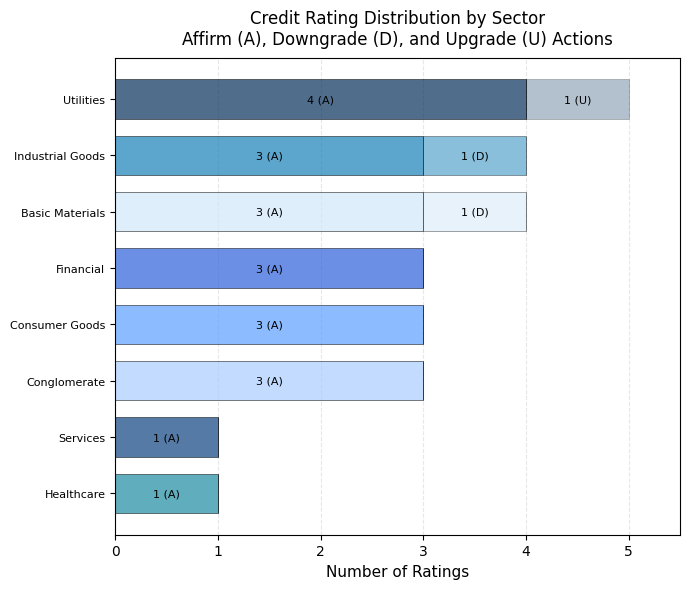

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create the data
data = {
    'sector': ['Basic Materials', 'Conglomerate', 'Consumer Goods', 'Financial', 
               'Healthcare', 'Industrial Goods', 'Services', 'Utilities'],
    'affirm': [3, 3, 3, 3, 1, 3, 1, 4],
    'downgrade': [1, 0, 0, 0, 0, 1, 0, 0],
    'upgrade': [0, 0, 0, 0, 0, 0, 0, 1],
    'Number of Ratings': [4, 3, 3, 3, 1, 4, 1, 5]
}

df = pd.DataFrame(data)

# Color palette
sector_colors = {
    'Basic Materials': '#D0E7F9',   # Very light sky blue
    'Conglomerate': '#A8CDFE',      # Light sky blue
    'Consumer Goods': '#5BA0FF',    # Bright, clear blue
    'Financial': '#2C60D9',         # Rich medium blue (unchanged)
    'Healthcare': '#1D8AA2',        # Teal-blue, more cyan/green hint for contrast
    'Industrial Goods': '#1780B9',  # Deep cyan-blue (teal hint, unchanged)
    'Services': '#0D427F',          # Dark blue-gray
    'Utilities': '#062F5B'          # Very dark blue
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 6))

# Sort data by total ratings for better visualization
df_sorted = df.sort_values('Number of Ratings')
y_positions = np.arange(len(df_sorted))

# Create horizontal stacked bars with consistent sector colors
bar_height = 0.7

# Affirm bars
ax.barh(y_positions, df_sorted['affirm'], bar_height,
        color=[sector_colors[sector] for sector in df_sorted['sector']],
        alpha=0.7, edgecolor='black', linewidth=0.5)

# Downgrade bars (using same sector colors)
ax.barh(y_positions, df_sorted['downgrade'], bar_height,
        left=df_sorted['affirm'],
        color=[sector_colors[sector] for sector in df_sorted['sector']],
        alpha=0.5, edgecolor='black', linewidth=0.5)

# Upgrade bars (using same sector colors)
ax.barh(y_positions, df_sorted['upgrade'], bar_height,
        left=df_sorted['affirm'] + df_sorted['downgrade'],
        color=[sector_colors[sector] for sector in df_sorted['sector']],
        alpha=0.3, edgecolor='black', linewidth=0.5)

# Set Y-axis
ax.set_yticks(y_positions)
ax.set_yticklabels(df_sorted['sector'], fontsize=8, ha='right')

# Set X-axis
ax.set_xlabel('Number of Ratings', fontsize=11, fontweight='normal')
ax.set_xlim(0, max(df_sorted['Number of Ratings']) * 1.1)

# Add value labels on bars with type annotation
for i, (idx, row) in enumerate(df_sorted.iterrows()):
    # Affirm labels
    if row['affirm'] > 0:
        ax.text(row['affirm']/2, i, f"{row['affirm']} (A)", 
                ha='center', va='center', fontsize=8)
    # Downgrade labels
    if row['downgrade'] > 0:
        ax.text(row['affirm'] + row['downgrade']/2, i, f"{row['downgrade']} (D)", 
                ha='center', va='center', fontsize=8)
    # Upgrade labels
    if row['upgrade'] > 0:
        ax.text(row['affirm'] + row['downgrade'] + row['upgrade']/2, i, f"{row['upgrade']} (U)", 
                ha='center', va='center', fontsize=8)

# Add grid
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Add title
plt.title('Credit Rating Distribution by Sector\nAffirm (A), Downgrade (D), and Upgrade (U) Actions', 
          fontsize=12, fontweight='normal', pad=10)

plt.tight_layout()
plt.show()

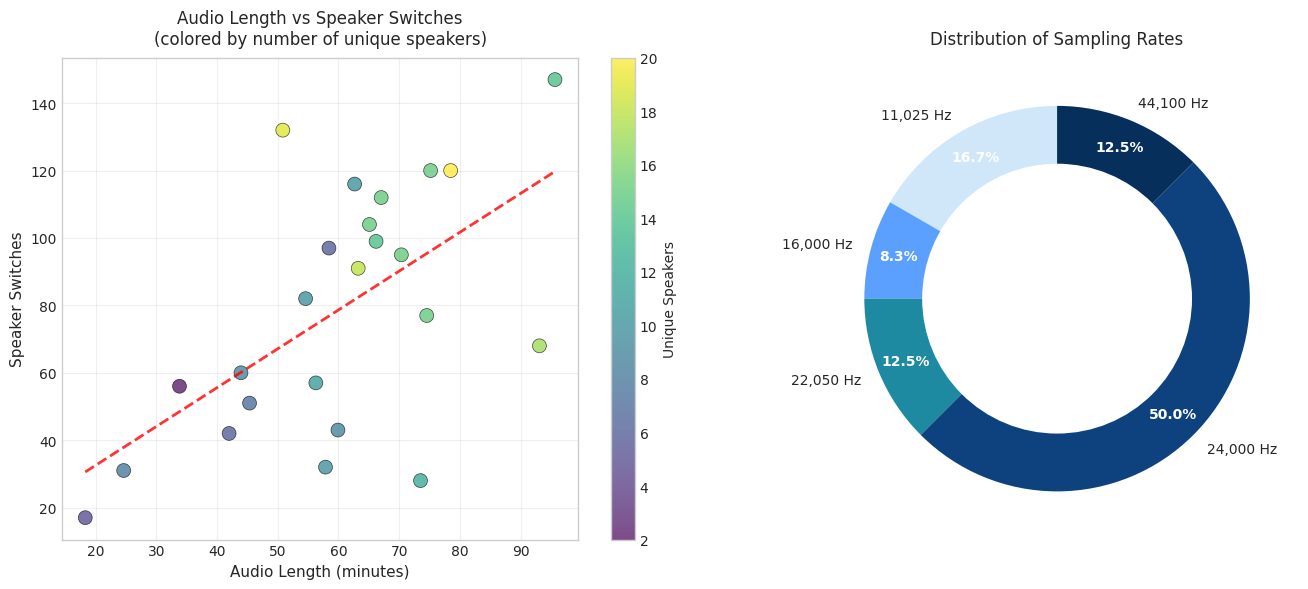


=== SUMMARY STATISTICS ===

Audio Length: 18.3 - 95.7 minutes (avg: 59.6)
Speaker Switches: 17 - 147 (avg: 78)
Unique Speakers: 2 - 20 (avg: 11.8)

Most common sampling rate: 24,000 Hz (12 files)

Correlation between Audio Length and Speaker Switches: 0.593


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Create the data
data = {
    'Audio Length': [5740.64, 2721.169, 3275.456, 3972.022, 4709.418, 3759.944, 
                     3906.752, 3595.023, 4511.312, 4411.446, 5586.921, 3506.05, 
                     2519.009, 4222.006, 2028.536, 3472.184, 3795.147, 3376.712, 
                     2636.382, 1476.776, 4022.624, 3049.832, 1097.1, 4472.768],
    'Sampling Rate': [24000, 44100, 24000, 11025, 16000, 24000, 24000, 11025, 
                      24000, 22050, 11025, 11025, 22050, 22050, 24000, 24000, 
                      44100, 24000, 44100, 24000, 24000, 24000, 16000, 24000],
    'Speaker Switches': [147, 51, 82, 99, 120, 116, 104, 43, 120, 28, 68, 97, 
                        42, 95, 56, 32, 91, 57, 60, 31, 112, 132, 17, 77],
    'Unique Speakers': [14, 7, 10, 14, 20, 10, 15, 9, 15, 12, 17, 6, 6, 15, 
                       2, 10, 18, 11, 9, 8, 15, 19, 5, 15]
}

df = pd.DataFrame(data)

# Add derived metric
df['Audio Length (min)'] = df['Audio Length'] / 60

# Set up the style
plt.style.use('seaborn-v0_8-whitegrid')

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 1. Scatter plot: Audio Length vs Speaker Switches (colored by Unique Speakers)
scatter = ax1.scatter(df['Audio Length (min)'], df['Speaker Switches'], 
                     c=df['Unique Speakers'], s=100, alpha=0.7, 
                     cmap='viridis', edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Audio Length (minutes)', fontsize=11)
ax1.set_ylabel('Speaker Switches', fontsize=11)
ax1.set_title('Audio Length vs Speaker Switches\n(colored by number of unique speakers)', 
              fontsize=12, pad=10)
cbar1 = plt.colorbar(scatter, ax=ax1)
cbar1.set_label('Unique Speakers', fontsize=10)

# Add trend line
z = np.polyfit(df['Audio Length (min)'], df['Speaker Switches'], 1)
p = np.poly1d(z)
ax1.plot(df['Audio Length (min)'].sort_values(), 
         p(df['Audio Length (min)'].sort_values()), 
         "r--", alpha=0.8, linewidth=2, label='Trend line')

# Add grid for better readability
ax1.grid(True, alpha=0.3)

# 2. Sampling Rate Distribution (pie chart)
sampling_counts = df['Sampling Rate'].value_counts().sort_index()

# Define custom colors using the provided palette
# Using the blue palette colors for different sampling rates
custom_colors = ['#D0E7F9', '#5BA0FF', '#1D8AA2', '#0D427F', '#062F5B']

# Map colors to sampling rates (using first n colors based on unique rates)
colors_to_use = custom_colors[:len(sampling_counts)]

wedges, texts, autotexts = ax2.pie(sampling_counts.values, 
                                   labels=[f'{rate:,} Hz' for rate in sampling_counts.index],
                                   colors=colors_to_use, 
                                   autopct='%1.1f%%', 
                                   startangle=90,
                                   pctdistance=0.85)

# Enhance pie chart appearance
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')

ax2.set_title('Distribution of Sampling Rates', fontsize=12, pad=10)

# Add a circle at the center to create a donut chart effect (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(centre_circle)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== SUMMARY STATISTICS ===\n")
print(f"Audio Length: {df['Audio Length (min)'].min():.1f} - {df['Audio Length (min)'].max():.1f} minutes (avg: {df['Audio Length (min)'].mean():.1f})")
print(f"Speaker Switches: {df['Speaker Switches'].min()} - {df['Speaker Switches'].max()} (avg: {df['Speaker Switches'].mean():.0f})")
print(f"Unique Speakers: {df['Unique Speakers'].min()} - {df['Unique Speakers'].max()} (avg: {df['Unique Speakers'].mean():.1f})")
print(f"\nMost common sampling rate: {df['Sampling Rate'].mode()[0]:,} Hz ({(df['Sampling Rate'] == df['Sampling Rate'].mode()[0]).sum()} files)")

# Print correlation
correlation = df['Audio Length (min)'].corr(df['Speaker Switches'])
print(f"\nCorrelation between Audio Length and Speaker Switches: {correlation:.3f}")